# Visualizing the World: An Introduction to Visualization

<img src="images/symbols.jpg"/>

http://www.cookbook-r.com/Graphs/Shapes_and_line_types/

In [1]:
# Load the dataset
WHO = read.csv("data/WHO.csv")

head(WHO)

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NA,1140,NA,NA
2,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NA,8820,NA,NA
3,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NA,8310,98.2,96.4
4,Andorra,Europe,78,15.20,22.86,NA,82,3.2,75.49,NA,NA,78.4,79.4
5,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2
6,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900,91.1,84.5


In [2]:
str(WHO)

'data.frame':	194 obs. of  13 variables:
 $ Country                      : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region                       : Factor w/ 6 levels "Africa","Americas",..: 3 4 1 4 1 2 2 4 6 4 ...
 $ Population                   : int  29825 3162 38482 78 20821 89 41087 2969 23050 8464 ...
 $ Under15                      : num  47.4 21.3 27.4 15.2 47.6 ...
 $ Over60                       : num  3.82 14.93 7.17 22.86 3.84 ...
 $ FertilityRate                : num  5.4 1.75 2.83 NA 6.1 2.12 2.2 1.74 1.89 1.44 ...
 $ LifeExpectancy               : int  60 74 73 82 51 75 76 71 82 81 ...
 $ ChildMortality               : num  98.5 16.7 20 3.2 163.5 ...
 $ CellularSubscribers          : num  54.3 96.4 99 75.5 48.4 ...
 $ LiteracyRate                 : num  NA NA NA NA 70.1 99 97.8 99.6 NA NA ...
 $ GNI                          : num  1140 8820 8310 NA 5230 ...
 $ PrimarySchoolEnrollmentMale  : num  NA NA 98.2 78.4 93.1 91.1 NA NA 96.9 NA ...
 $ Prim

### Plot using plot function

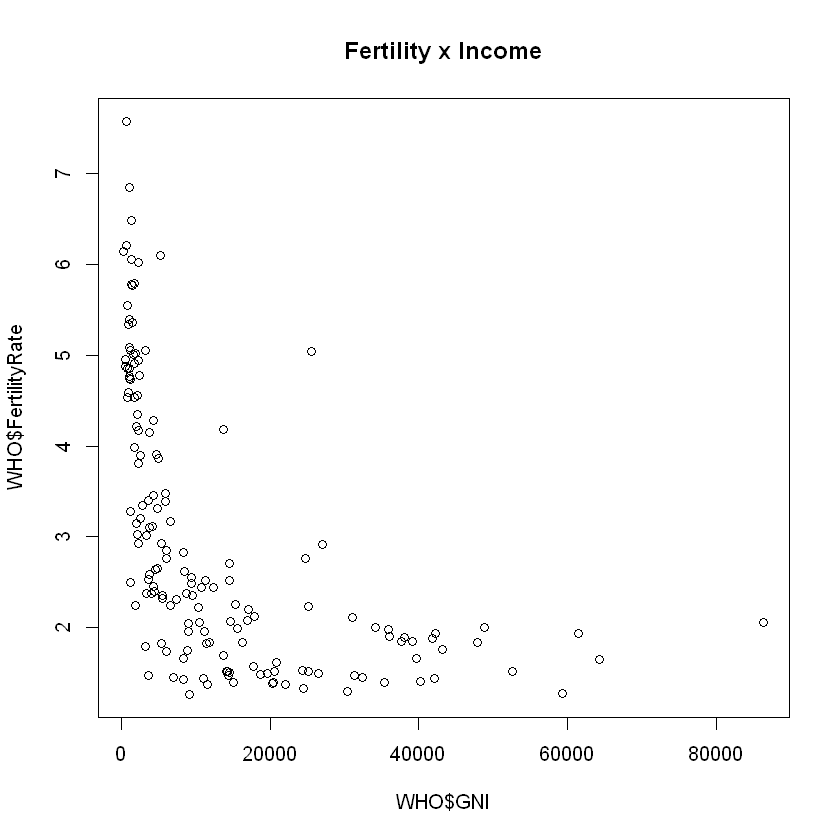

In [3]:
# Plot from Week 1

plot(WHO$GNI, WHO$FertilityRate, main="Fertility x Income")

### Let's redo this using ggplot

In [4]:
# Install and load the ggplot2 library:
#install.packages("ggplot2")
library(ggplot2)

Remember we need at least three things to create a plot using ggplot: **data**, an **aesthetic mapping of variables in the data frame to visual output**, and **a geometric object**.

Warning message:
"Removed 35 rows containing missing values (geom_point)."


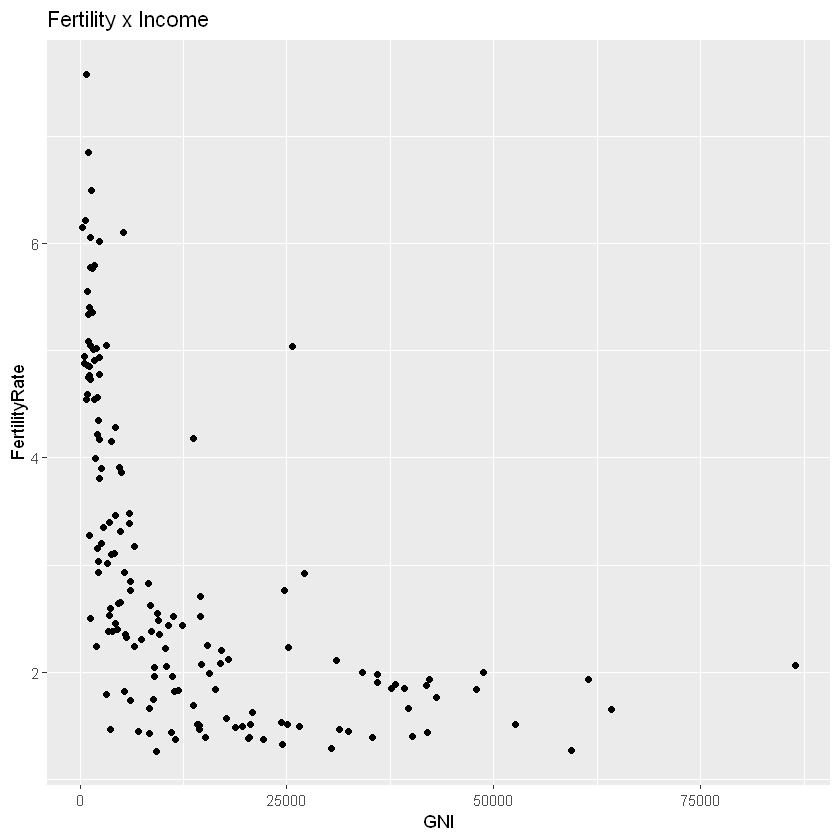

In [5]:
# Create the ggplot object with the data and the aesthetic mapping:
scatterplot = ggplot(WHO, aes(x = GNI, y = FertilityRate))

# Add the geom_point geometry
scatterplot + geom_point() + labs(title="Fertility x Income")

Warning message:
"Removed 32 row(s) containing missing values (geom_path)."


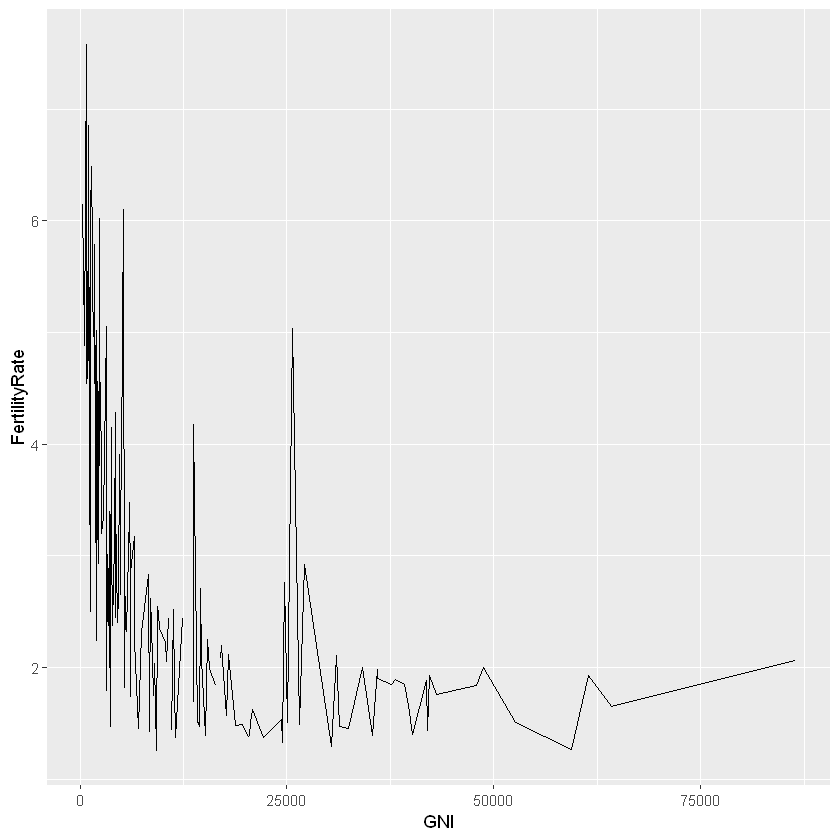

In [6]:
# Make a line graph instead:
scatterplot + geom_line()

Warning message:
"Removed 35 rows containing missing values (geom_point)."


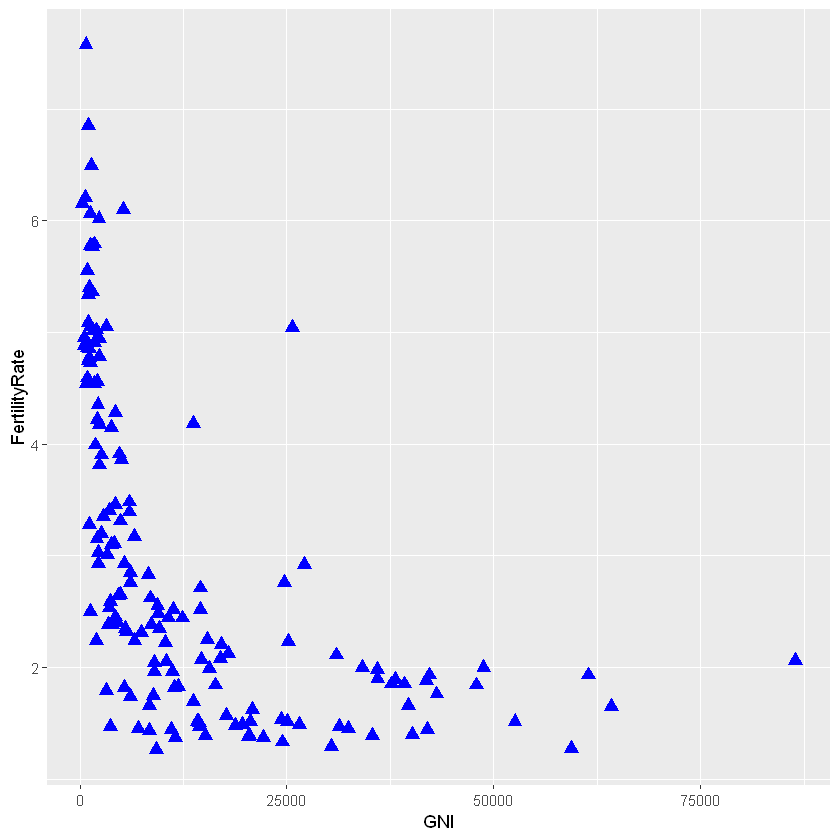

In [7]:
# Redo the plot with blue triangles instead of circles:
scatterplot + geom_point(color = "blue", size = 3, shape = 17) 

Warning message:
"Removed 35 rows containing missing values (geom_point)."


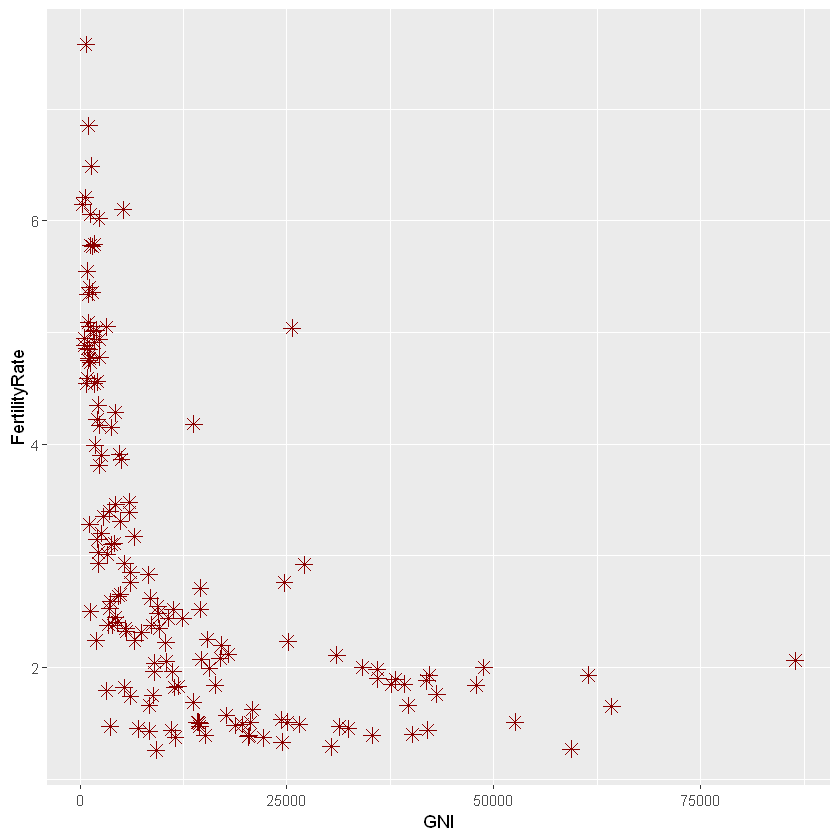

In [8]:
# Another option:
scatterplot + geom_point(color = "darkred", size = 3, shape = 8) 

Warning message:
"Removed 35 rows containing missing values (geom_point)."


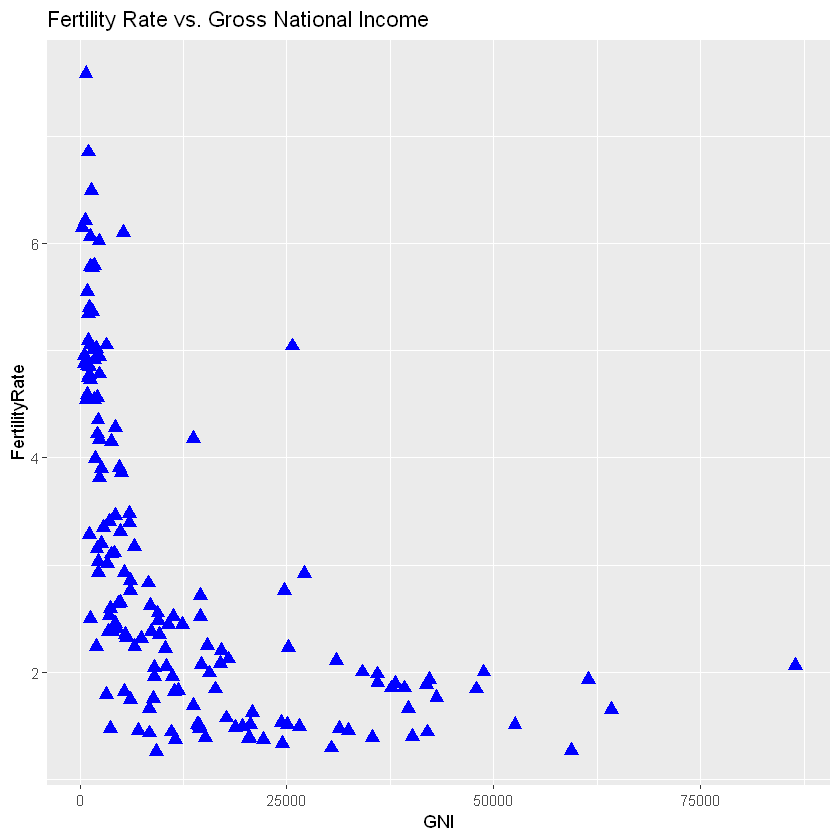

In [9]:
# Add a title to the plot:
scatterplot + geom_point(colour = "blue", size = 3, shape = 17) + ggtitle("Fertility Rate vs. Gross National Income")

### Save the Plot

In [10]:
# Save our plot:
fertilityGNIplot = scatterplot + geom_point(colour = "blue", size = 3, shape = 17) + 
                                 ggtitle("Fertility Rate vs. Gross National Income")

# Save as pdf:
pdf("images/MyPlot.pdf")

# Print our Plot in the file Myplot:
print(fertilityGNIplot)

# Close the file
dev.off()

Warning message:
"Removed 35 rows containing missing values (geom_point)."


png 
  2

## Advanced Plots

Warning message:
"Removed 35 rows containing missing values (geom_point)."


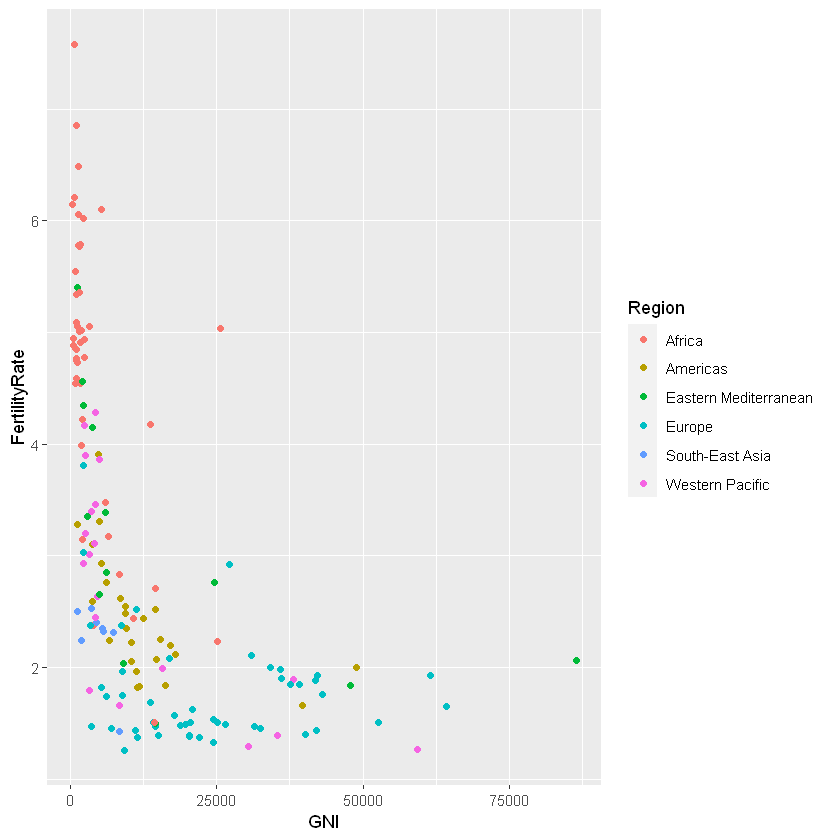

In [11]:
# Color the points by region: 
ggplot(WHO, aes(x = GNI, y = FertilityRate, color = Region)) + geom_point()

Warning message:
"Removed 35 rows containing missing values (geom_point)."


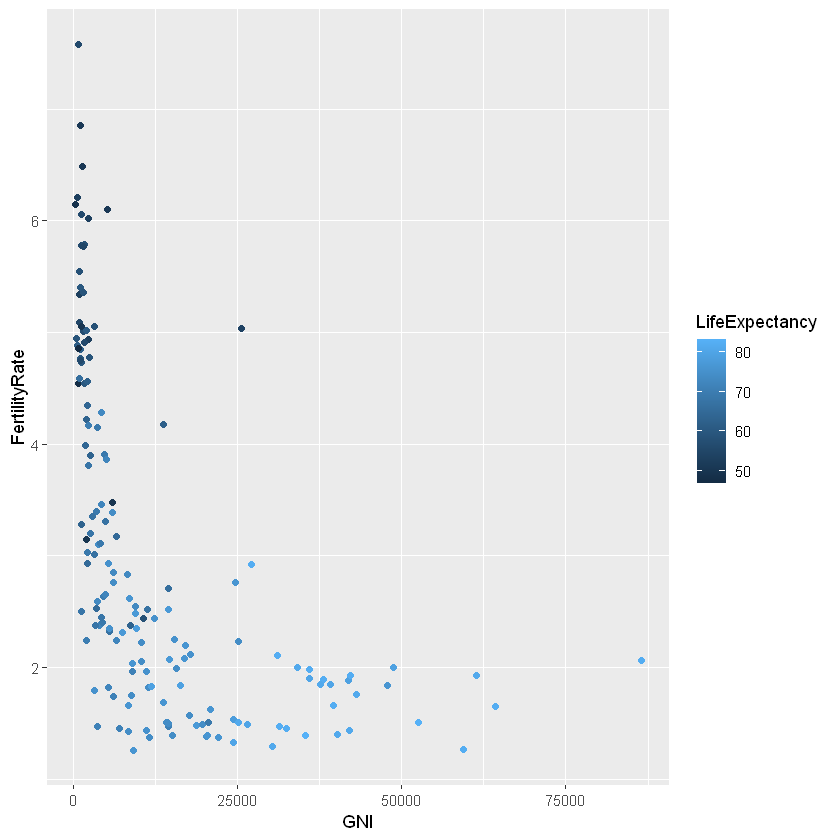

In [12]:
# Color the points according to life expectancy:
ggplot(WHO, aes(x = GNI, y = FertilityRate, color = LifeExpectancy)) + geom_point()

Warning message:
"Removed 11 rows containing missing values (geom_point)."


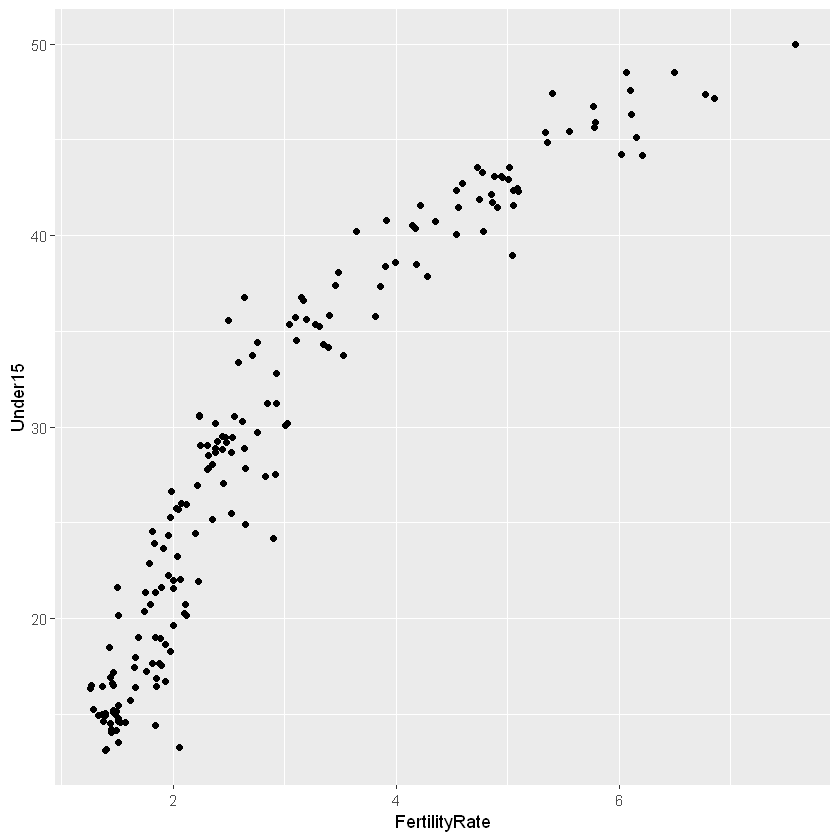

In [13]:
# Is the fertility rate of a country was a good predictor of the percentage of the population under 15?
ggplot(WHO, aes(x = FertilityRate, y = Under15)) + geom_point()

This is really interesting. It looks like the variables are certainly correlated, but as the fertility rate increases, the variable, Under15 starts increasing less. So this doesn't really look like a linear relationship. But we suspect that **a log transformation** of FertilityRate will be better. Let's give it a shot.

Warning message:
"Removed 11 rows containing missing values (geom_point)."


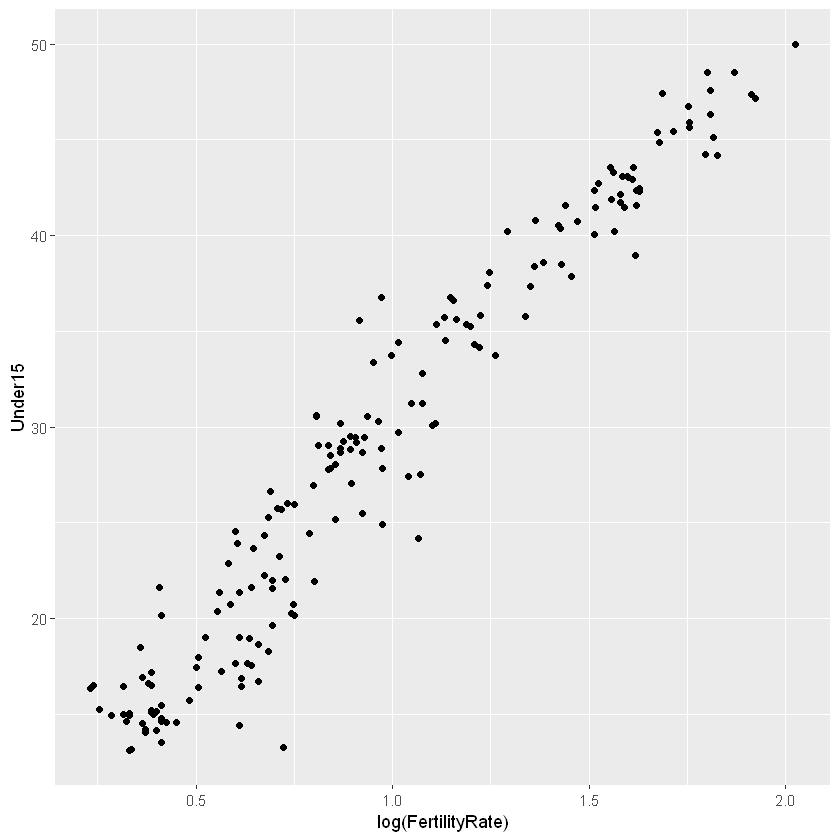

In [14]:
# Let's try a log transformation:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + geom_point()

Let's try a **Linear Regression** in this case:

In [15]:
# Simple linear regression model to predict the percentage of the population under 15, using the log of the fertility rate:
mod = lm(Under15 ~ log(FertilityRate), data = WHO)
summary(mod)


Call:
lm(formula = Under15 ~ log(FertilityRate), data = WHO)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3131  -1.7742   0.0446   1.7440   7.7174 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.6540     0.4478   17.09   <2e-16 ***
log(FertilityRate)  22.0547     0.4175   52.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.65 on 181 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.9391,	Adjusted R-squared:  0.9387 
F-statistic:  2790 on 1 and 181 DF,  p-value: < 2.2e-16


### Add this regression line to our plot.

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 11 rows containing missing values (geom_point)."


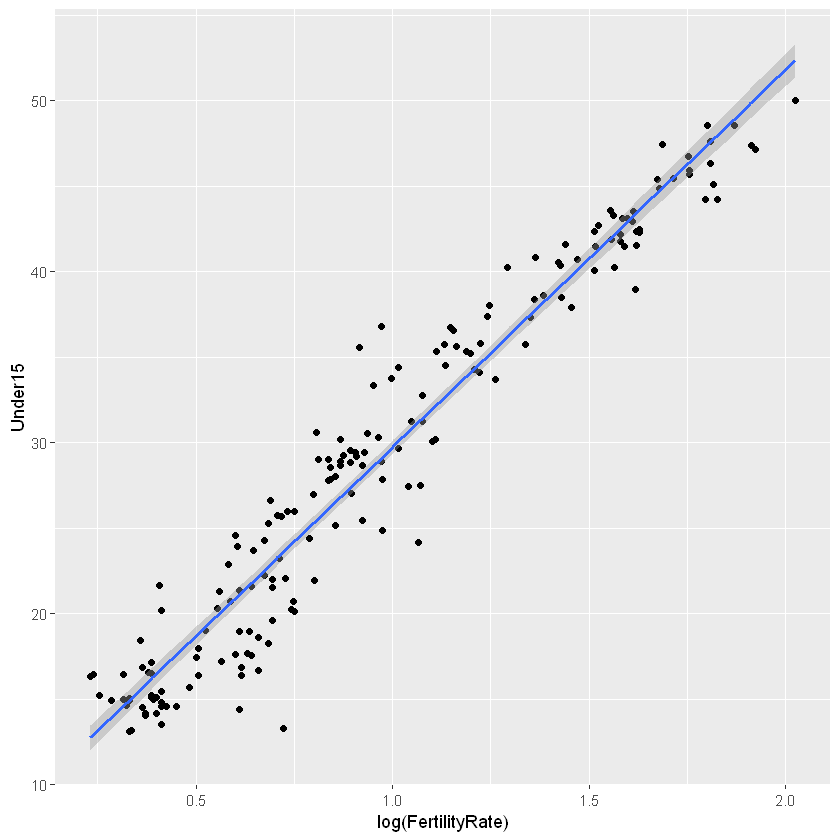

In [16]:
# Add this regression line to our plot:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + geom_point() + stat_smooth(method = "lm")

By default, ggplot will draw a **95% confidence interval** shaded around the line. We can change this by specifying options
within the statistics layer. So go ahead and scroll up in the R console, and after method = "lm", type level = 0.99, and hit Enter. This will give a **99% confidence interval**.

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 11 rows containing missing values (geom_point)."


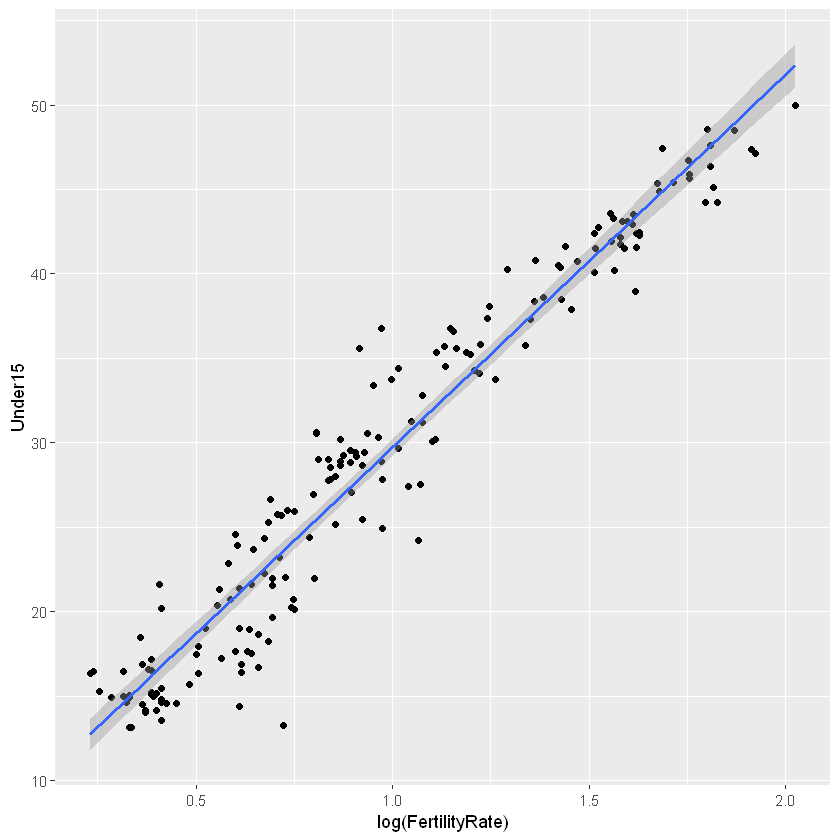

In [17]:
# 99% confidence interval
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + geom_point() + stat_smooth(method = "lm", level = 0.99)

We could instead **take away the confidence interval** altogether by deleting level = 0.99 and typing **se = FALSE**. Now, we just have the regression line in blue.

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 11 rows containing missing values (geom_point)."


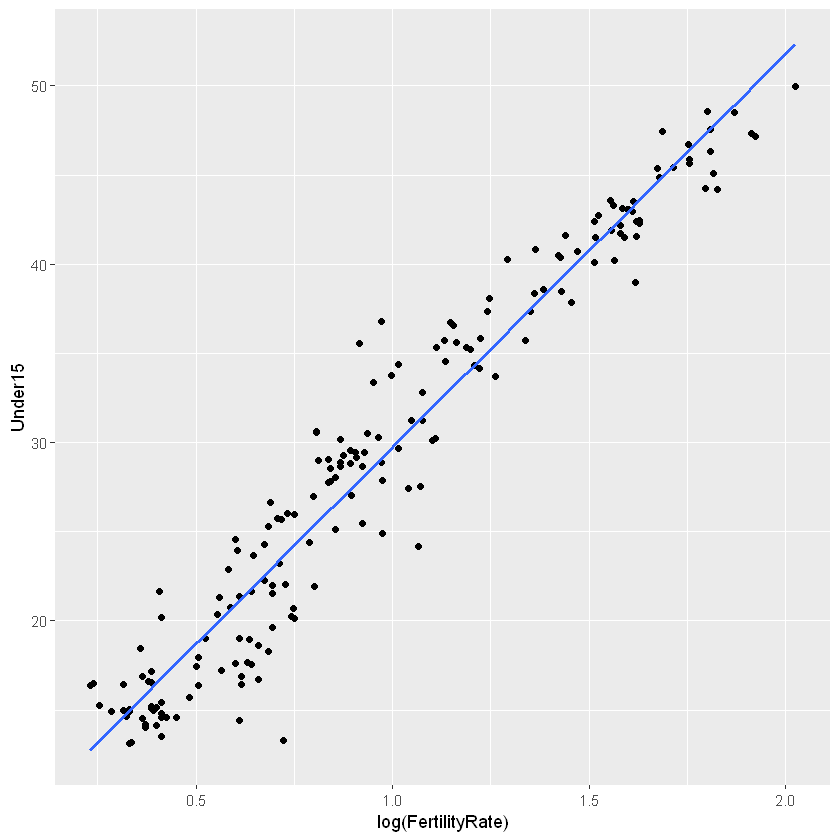

In [18]:
# No confidence interval in the plot
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + geom_point() + stat_smooth(method = "lm", se = FALSE)

We could also **change the color of the regression line** by typing as an option, **color = "orange"**.

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 11 rows containing missing values (geom_point)."


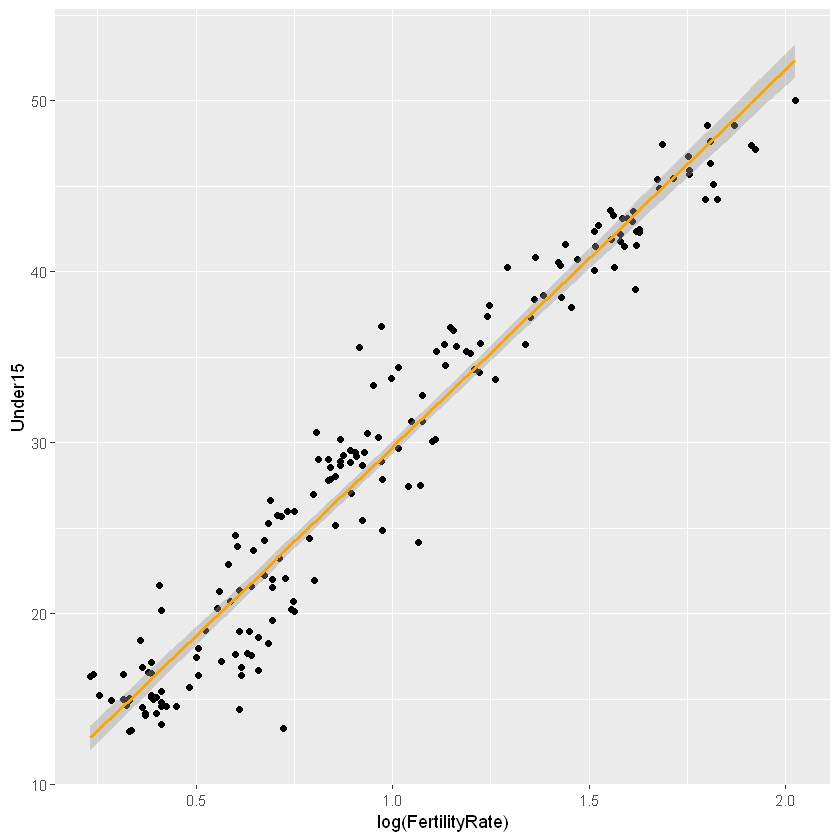

In [19]:
# Change the color of the regression line:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + geom_point() + stat_smooth(method = "lm", colour = "orange")